In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as stats
%matplotlib inline

In [266]:
df = pd.read_csv("cleaning Adult census project.csv",index_col=0)

In [267]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0


In [268]:
df.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,1,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,1,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,15024,0,40,United-States,0,1


In [269]:
df.final_weight.describe()

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: final_weight, dtype: float64

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


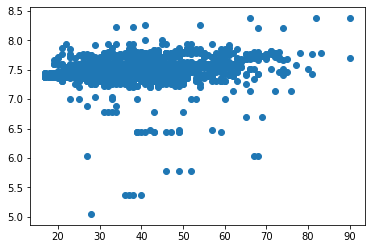

In [270]:
plt.scatter(df["age"],np.log(df["capital_loss"]))

In [271]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [272]:
df["native_country"] = np.where(df["native_country"] == "United-States","US","outsideUS")

In [273]:
df["native_country"].value_counts()

US           29153
outsideUS     3384
Name: native_country, dtype: int64

In [274]:
df.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [275]:
df["native_country"].value_counts()

US           29153
outsideUS     3384
Name: native_country, dtype: int64

In [276]:
df["education"].value_counts().index

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object')

In [277]:
df["education"] = df["education"].map({'Preschool':'nobachelors',
                                      '1st-4th':'nobachelors',
                                      '5th-6th':'nobachelors',
                                      '7th-8th':'nobachelors',
                                      '9th':'nobachelors',
                                      '10th':'nobachelors',
                                      '11th':'nobachelors',
                                      '12th':'nobachelors',
                                      'HS-grad': 'hsdiploma',
                                      'Some-college':'somecollege',
                                       'Assoc-voc':'associates',
                                        'Assoc-acdm':'associates',
                                      'Bachelors': 'hasbachelors',
                                       'Masters':'Masters',
                                       'Prof-school':'Prof_school',
                                       'Doctorate':'Phd'})
df["education"]

0        hasbachelors
1        hasbachelors
2           hsdiploma
3         nobachelors
4        hasbachelors
             ...     
32556      associates
32557       hsdiploma
32558       hsdiploma
32559       hsdiploma
32560       hsdiploma
Name: education, Length: 32537, dtype: object

In [278]:
df["education"]

0        hasbachelors
1        hasbachelors
2           hsdiploma
3         nobachelors
4        hasbachelors
             ...     
32556      associates
32557       hsdiploma
32558       hsdiploma
32559       hsdiploma
32560       hsdiploma
Name: education, Length: 32537, dtype: object

In [279]:
df["marital_status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [280]:
df["marital_status"] = df["marital_status"].map({"Married-civ-spouse":"married-civ-spouse",
                                        "Never-married":"never-married",
                                        "Divorced":"other",
                                         "Separated":"other",
                                           "Widowed":"other",
                                             "Married-spouse-absent":"other",
                                               "Married-AF-spouse":"other" })

In [281]:
df["marital_status"].value_counts()

married-civ-spouse    14970
never-married         10667
other                  6900
Name: marital_status, dtype: int64

In [282]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [283]:
df["workclass"] = df["workclass"].map({"Private":"private",
                                      "Self-emp-not-inc":"selfemployed",
                                      "Local-gov":"govermentjob",
                                      "State-gov":"govermentjob",
                                      "Federal-gov":"govermentjob",
                                     "Self-emp-inc":"selfemployed",
                                      "?":"other",
                                      "Without-pay":"other",
                                     "Never-worked":"other" })

In [284]:
df["workclass"].value_counts()

private         22673
govermentjob     4351
selfemployed     3656
other            1857
Name: workclass, dtype: int64

In [285]:
df["relationship"].value_counts() # not sure how to reclassify these

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [286]:
df["relationship"] = df["relationship"].map({"Husband":"married",
                                            "Wife":"married",
                                            "Not-in-family":"not_in_family",
                                            "Own-Child":"other",
                                            "Unmarried":"other",
                                            "Other-relative":"other"})
df["relationship"].value_counts()

married          14755
not_in_family     8292
other             4426
Name: relationship, dtype: int64

In [287]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_Male',
       'salary_range_>50K'],
      dtype='object')

In [288]:
df["occupation"].value_counts()/len(df['occupation'])

Prof-specialty       0.127117
Craft-repair         0.125826
Exec-managerial      0.124935
Adm-clerical         0.115807
Sales                0.112180
Other-service        0.101146
Machine-op-inspct    0.061468
?                    0.056643
Transport-moving     0.049083
Handlers-cleaners    0.042075
Farming-fishing      0.030488
Tech-support         0.028491
Protective-serv      0.019947
Priv-house-serv      0.004518
Armed-Forces         0.000277
Name: occupation, dtype: float64

In [289]:
df['occupation'] = df['occupation'].map({"Prof-specialty":"prof_speciality",
                                         "Craft-repair":"craft_repair",
                                        "Exec-managerial":"managerial",
                                        "Adm-clerical":"Adm_clerical",
                                        "Sales":"sales",
                                        "Other-service":"other/service",
                                        "Machine-op-inspct":"other/service",
                                        "?":"other/service",
                                       "Transport-moving":"other/service",
                                        "Handlers-cleaners":"other/service",
                                        "Farming-fishing":"other/service",
                                        "Tech-support":"other/service",
                                        "Protective-serv":"other/service",
                                        "Priv-house-serv":"other/service",
                                        "Armed-Forces":"other/service"})

In [290]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
0,39,govermentjob,77516,hasbachelors,13,never-married,Adm_clerical,not_in_family,White,2174,0,40,US,1,0
1,50,selfemployed,83311,hasbachelors,13,married-civ-spouse,managerial,married,White,0,0,13,US,1,0
2,38,private,215646,hsdiploma,9,other,other/service,not_in_family,White,0,0,40,US,1,0
3,53,private,234721,nobachelors,7,married-civ-spouse,other/service,married,Black,0,0,40,US,1,0
4,28,private,338409,hasbachelors,13,married-civ-spouse,prof_speciality,married,Black,0,0,40,outsideUS,0,0


In [291]:
categorical_feature_mask = df.dtypes == "object"
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [292]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
enc = OneHotEncoder(categorical_features = categorical_feature_mask ,sparse=False)
# to classify catorical columns ingore anything not classified

In [293]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)),axis=0,result_type='expand')
df[categorical_cols]

,workclass,education,marital_status,occupation,relationship,race,native_country
0,0,4,1,0,2,4,0
1,3,4,0,2,0,4,0
2,2,5,2,3,2,4,0
3,2,6,0,3,0,2,0
4,2,4,0,4,0,2,1
...,...,...,...,...,...,...,...
32556,2,3,0,3,0,4,0
32557,2,5,0,3,0,4,0
32558,2,5,2,0,3,4,0
32559,2,5,1,0,1,4,0


In [294]:
enc.fit_transform(df)


C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1.,  0.,  0., ..., 40.,  1.,  0.],
       [ 0.,  0.,  0., ..., 13.,  1.,  0.],
       [ 0.,  0.,  1., ..., 40.,  1.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 40.,  0.,  0.],
       [ 0.,  0.,  1., ..., 20.,  1.,  0.],
       [ 0.,  0.,  0., ..., 40.,  0.,  1.]])

In [295]:
enc.categories_

[array([0., 1., 2., 3.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 array([0., 1., 2.]),
 array([0., 1., 2., 3., 4., 5.]),
 array([0., 1., 2., 3.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1.])]

In [443]:
#X = [["prof_speciality",0],["craft_repair",1],["managerial",2],["Adm_clerical",3],["sales",4],["other/service",5]]

In [296]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1,0
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1,0
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1,0
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1,0
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0,0


In [297]:
y = df["salary_range_>50K"]#target variable
x = df[["age",'workclass','final_weight','education','education_num','marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_Male']]
#X = pd.get_dummies(x,)

In [298]:
x

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,3,12,0,3,0,4,0,0,38,0,0
32557,40,2,154374,5,9,0,3,0,4,0,0,40,0,1
32558,58,2,151910,5,9,2,0,3,4,0,0,40,0,0
32559,22,2,201490,5,9,1,0,1,4,0,0,20,0,1


In [299]:
y


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary_range_>50K, Length: 32537, dtype: int64

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [301]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=25)

In [302]:
lgr = LogisticRegression()

In [303]:
lgr.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
lgr.score(X_test,y_test)

0.8002458512599877

In [305]:
dtree = DecisionTreeClassifier()

In [306]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [307]:
dtree.score(X_test,y_test)

0.8106945298094653

In [308]:
pred = dtree.predict(X_test)# try to come up with a column probability that calculates probability of getting over 50k based on education
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
probs = dtree.predict_proba(X_test)
probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [202]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [310]:
import scikitplot as skplt

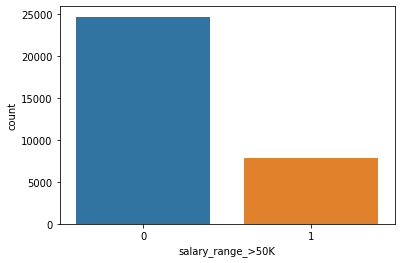

In [311]:
import seaborn as sns
sns.countplot(y) # might want to considering resampling

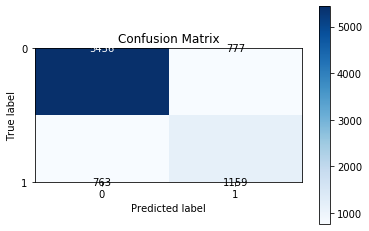

In [312]:
skplt.metrics.plot_confusion_matrix(y_test,pred)

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
forest = RandomForestClassifier()

In [315]:
forest.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [316]:
forest.score(X_test,y_test)

0.8460971112476952

In [317]:
pred_forest = forest.predict(X_test)
pred_forest

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [318]:
probs_forest = forest.predict_proba(X_test)
probs_forest

array([[0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

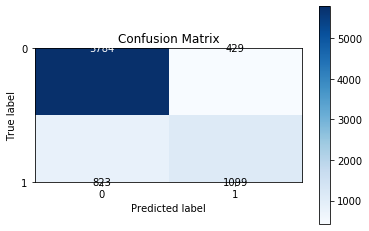

In [319]:
skplt.metrics.plot_confusion_matrix(y_test,pred_forest)

In [320]:
forest_new_preds = np.where(probs_forest[:,1]<.4,0,1)
forest_new_preds

array([1, 0, 0, ..., 0, 0, 0])

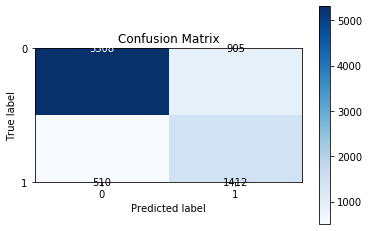

In [321]:
skplt.metrics.plot_confusion_matrix(y_test,forest_new_preds)

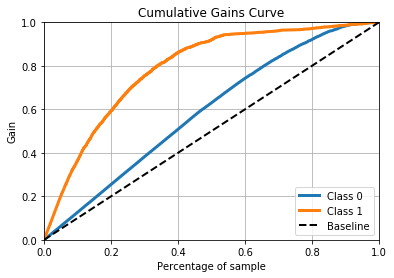

In [322]:
skplt.metrics.plot_cumulative_gain(y_test,probs_forest)

In [323]:
importance = forest.feature_importances_

In [324]:
feature_importance = dict(zip(df.columns,importance))
feature_importance

{'age': 0.1682107675938328,
 'workclass': 0.030151549861498272,
 'final_weight': 0.18300996192959226,
 'education': 0.04536803560017008,
 'education_num': 0.08509294637797812,
 'marital_status': 0.0759313849766527,
 'occupation': 0.04789572508073407,
 'relationship': 0.10606217739019534,
 'race': 0.014126275917063174,
 'capital_gain': 0.10651172383628657,
 'capital_loss': 0.03164055312423371,
 'hours_per_week': 0.08236679502052921,
 'native_country': 0.010020987695374206,
 'sex_Male': 0.01361111559585946}

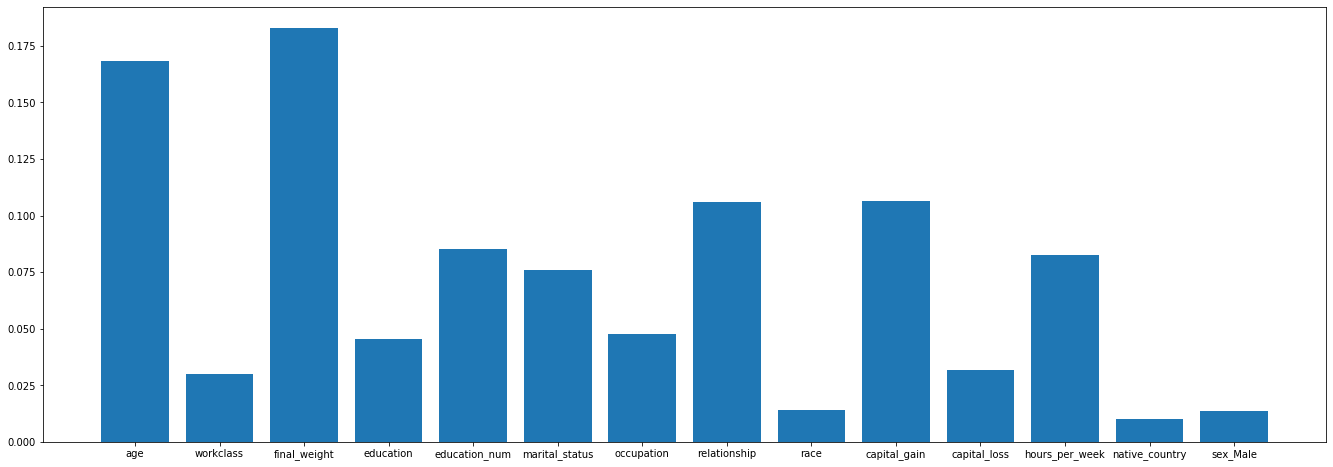

In [325]:
plt.figure(figsize=(23,8))
plt.bar(range(len(feature_importance)),list(feature_importance.values()),align='center')
plt.xticks(range(len(feature_importance)),list(feature_importance.keys()))
plt.show()


In [326]:
df['final_weight'].describe() 

count    3.253700e+04
mean     1.897808e+05
std      1.055565e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.369930e+05
max      1.484705e+06
Name: final_weight, dtype: float64

In [327]:
from sklearn.utils import resample

In [328]:
minority_class = df.loc[df['salary_range_>50K'] == 1]
majority_class = df.loc[df['salary_range_>50K']== 0]
y.value_counts()

0    24698
1     7839
Name: salary_range_>50K, dtype: int64

In [329]:
resampled_minority_class = resample(minority_class,replace = True,n_samples = 24698,random_state = 25)
data_up_sampled = pd.concat([majority_class,resampled_minority_class])

In [330]:
data_up_sampled

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,salary_range_>50K
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1,0
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1,0
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1,0
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1,0
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1


In [331]:
data_up_sampled['salary_range_>50K'].value_counts()

1    24698
0    24698
Name: salary_range_>50K, dtype: int64

In [332]:
x2 = data_up_sampled[["age",'workclass','final_weight','education','education_num','marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_Male']]
y2 = data_up_sampled['salary_range_>50K']

In [333]:
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,y2,random_state=25)

In [334]:
forest.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [335]:
forest.score(X2_test,y2_test) # my test performed better when resampling

0.9249331929710908

In [336]:
pred_sampled = forest.predict(X2_test)
pred_sampled

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [337]:
prob_sampled = forest.predict_proba(X2_test)
prob_sampled

array([[0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       ...,
       [0.4, 0.6],
       [1. , 0. ],
       [0.7, 0.3]])

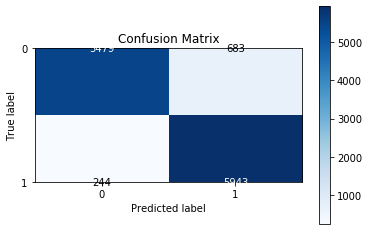

In [338]:
skplt.metrics.plot_confusion_matrix(y2_test,pred_sampled)

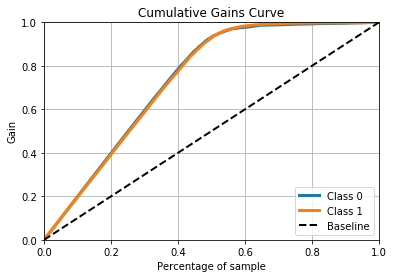

In [339]:
skplt.metrics.plot_cumulative_gain(y2_test,prob_sampled)

In [347]:
x2['predicted_prob'] = forest.predict_proba(x2)[:,1]

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 15 

In [341]:
x2

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1,0.1
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1,0.1
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1,0.1
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1,0.4
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1.0
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1.0
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1.0
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1.0


In [375]:
x2['decile'] = pd.qcut(x2['predicted_prob'],9,labels = [i for i in range(0,4)],duplicates='drop')
x2

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,decile
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1,0.1,0
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1,0.1,0
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1,0.1,0
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1,0.4,2
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1.0,3
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1.0,3
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1.0,3
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1.0,3


In [376]:
(x2.groupby('decile')['predicted_prob'].mean()).to_frame()

,predicted_prob
decile,
0,0.019502
1,0.237253
2,0.751568
3,1.000000


In [377]:
x2.loc[x2['decile'] == 3]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,decile
290,36,2,200352,4,13,0,4,0,4,0,0,45,0,1,1.0,3
791,41,3,32185,4,13,0,3,0,4,0,0,40,0,1,1.0,3
895,40,2,170108,0,14,0,4,0,4,0,0,40,0,1,1.0,3
1935,90,2,221832,4,13,0,2,0,4,0,0,45,0,1,1.0,3
2200,65,2,90377,3,11,0,3,0,4,6767,0,60,0,1,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1.0,3
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1.0,3
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1.0,3
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1.0,3


In [380]:
model_data = pd.concat((x2,y2),axis=1,sort=False)
model_data

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,decile,salary_range_>50K
0,39,0,77516,4,13,1,0,2,4,2174,0,40,0,1,0.1,0,0
1,50,3,83311,4,13,0,2,0,4,0,0,13,0,1,0.1,0,0
2,38,2,215646,5,9,2,3,2,4,0,0,40,0,1,0.1,0,0
3,53,2,234721,6,7,0,3,0,2,0,0,40,0,1,0.4,2,0
4,28,2,338409,4,13,0,4,0,2,0,0,40,1,0,0.4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1.0,3,1
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1.0,3,1
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1.0,3,1
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1.0,3,1


In [383]:
model_data.loc[model_data['decile'] == 3]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_Male,predicted_prob,decile,salary_range_>50K
290,36,2,200352,4,13,0,4,0,4,0,0,45,0,1,1.0,3,0
791,41,3,32185,4,13,0,3,0,4,0,0,40,0,1,1.0,3,0
895,40,2,170108,0,14,0,4,0,4,0,0,40,0,1,1.0,3,0
1935,90,2,221832,4,13,0,2,0,4,0,0,45,0,1,1.0,3,0
2200,65,2,90377,3,11,0,3,0,4,6767,0,60,0,1,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,49,2,247294,5,9,0,1,0,4,0,0,45,0,1,1.0,3,1
6900,48,2,138970,4,13,0,2,0,4,0,0,45,0,1,1.0,3,1
29316,50,2,146325,5,9,0,1,0,4,0,0,44,0,1,1.0,3,1
10408,39,2,137522,5,9,0,3,0,1,0,0,40,1,1,1.0,3,1
